In [63]:
import pandas as pd

In [64]:
courses = ['cs105','stat107','stat207','ansc307','hist407']
courses

['cs105', 'stat107', 'stat207', 'ansc307', 'hist407']

In [65]:
type(courses)

list

In [66]:
enrollment = [479,343,226,55,22]
enrollment

[479, 343, 226, 55, 22]

In [67]:
type(enrollment)

list

In [68]:
enrollment[0]

479

In [69]:
display(type(courses[0]),type(enrollment[0]))

str

int

In [70]:
course_dictionary = {'courses':courses,'enrollment':enrollment}
course_dictionary

{'courses': ['cs105', 'stat107', 'stat207', 'ansc307', 'hist407'],
 'enrollment': [479, 343, 226, 55, 22]}

In [71]:
littledf = pd.DataFrame(course_dictionary)
littledf

,courses,enrollment
0,cs105,479
1,stat107,343
2,stat207,226
3,ansc307,55
4,hist407,22


In [72]:
type(course_dictionary)

dict

In [73]:
littledf['colleges'] = ['ENGR','LAS','LAS','ACES','LAS']
littledf

,courses,enrollment,colleges
0,cs105,479,ENGR
1,stat107,343,LAS
2,stat207,226,LAS
3,ansc307,55,ACES
4,hist407,22,LAS


In [74]:
littledf.shape

(5, 3)

In [75]:
littledf.to_csv('courses.csv')

In [76]:
tryit = littledf.copy()
tryit

,courses,enrollment,colleges
0,cs105,479,ENGR
1,stat107,343,LAS
2,stat207,226,LAS
3,ansc307,55,ACES
4,hist407,22,LAS


In [77]:
tryit['isfull'] = ['no','no','no','yes','no']
tryit

,courses,enrollment,colleges,isfull
0,cs105,479,ENGR,no
1,stat107,343,LAS,no
2,stat207,226,LAS,no
3,ansc307,55,ACES,yes
4,hist407,22,LAS,no


In [78]:
type(tryit['isfull'])

pandas.core.series.Series

In [79]:
len(tryit[tryit['isfull']== 'no'])/len(tryit)

0.8

In [80]:
isfull_count = tryit['isfull'].value_counts(normalize = True)
display(isfull_count)

no     0.8
yes    0.2
Name: isfull, dtype: float64

In [81]:
import seaborn as sns
sns.set()

<AxesSubplot: ylabel='isfull'>

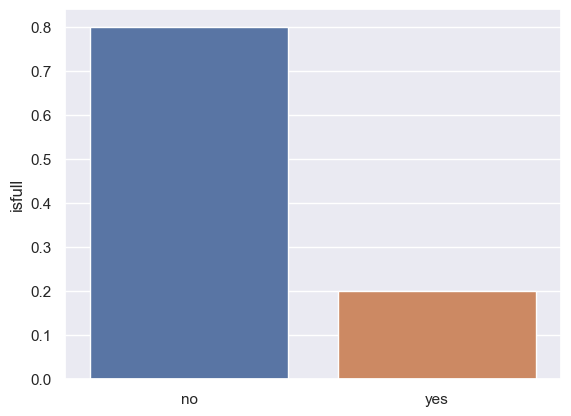

In [82]:
sns.barplot(x = isfull_count.index, y = isfull_count)

In [83]:
littledf.iloc[0,0]

'cs105'

In [84]:
littledf.iloc[3,2]

'ACES'

In [85]:
littledf[1:4]

,courses,enrollment,colleges
1,stat107,343,LAS
2,stat207,226,LAS
3,ansc307,55,ACES


In [86]:
littledf.iloc[1:4]

,courses,enrollment,colleges
1,stat107,343,LAS
2,stat207,226,LAS
3,ansc307,55,ACES


In [87]:
littledf.iloc[[1,2,4],:]

,courses,enrollment,colleges
1,stat107,343,LAS
2,stat207,226,LAS
4,hist407,22,LAS


In [88]:
littledf['colleges'] == 'LAS'

0    False
1     True
2     True
3    False
4     True
Name: colleges, dtype: bool

In [89]:
littledf['enrollment'] > 100

0     True
1     True
2     True
3    False
4    False
Name: enrollment, dtype: bool

In [90]:
littledf[littledf['colleges'] != 'LAS']

,courses,enrollment,colleges
0,cs105,479,ENGR
3,ansc307,55,ACES


In [91]:
littledf.shape

(5, 3)

In [92]:
littledf['enrollment'].sum()

1125

In [93]:
littledf['enrollment'].max()

479

In [94]:
littledf['enrollment'].min()

22

In [95]:
littledf['courses'][littledf['enrollment'] == littledf['enrollment'].min()]  #important

4    hist407
Name: courses, dtype: object

In [96]:
littledf['courses'][littledf['enrollment'] == littledf['enrollment'].max()]

0    cs105
Name: courses, dtype: object

In [97]:
littledf['enrollment'].mean()

225.0

In [98]:
littledf[littledf['colleges'] == 'LAS']['enrollment'].shape

(3,)

In [99]:
littledf['colleges'].value_counts()

LAS     3
ENGR    1
ACES    1
Name: colleges, dtype: int64

In [100]:
littledf[littledf['colleges'] == 'LAS']['enrollment'].sum()

591

In [101]:
moredf = pd.DataFrame({'courses':['math227','IS457'],'enrollment':[59,58],'colleges':['LAS','ACES']})

In [102]:
moredf

,courses,enrollment,colleges
0,math227,59,LAS
1,IS457,58,ACES


In [103]:
fulldf = pd.concat([littledf,moredf])

In [104]:
fulldf

,courses,enrollment,colleges
0,cs105,479,ENGR
1,stat107,343,LAS
2,stat207,226,LAS
3,ansc307,55,ACES
4,hist407,22,LAS
0,math227,59,LAS
1,IS457,58,ACES


In [105]:
fulldf2 = pd.concat([littledf,moredf], ignore_index = True)
fulldf2

,courses,enrollment,colleges
0,cs105,479,ENGR
1,stat107,343,LAS
2,stat207,226,LAS
3,ansc307,55,ACES
4,hist407,22,LAS
5,math227,59,LAS
6,IS457,58,ACES


In [106]:
newdf = pd.DataFrame({'courses':['badm201'],'enrollment':[388],'colleges':['LAS']})
newdf

,courses,enrollment,colleges
0,badm201,388,LAS


In [107]:
fulldf2 = pd.concat([littledf,newdf,moredf], ignore_index = True)  # remember to use ignore_index
fulldf2

,courses,enrollment,colleges
0,cs105,479,ENGR
1,stat107,343,LAS
2,stat207,226,LAS
3,ansc307,55,ACES
4,hist407,22,LAS
5,badm201,388,LAS
6,math227,59,LAS
7,IS457,58,ACES


In [108]:
creditdf = pd.DataFrame({'courses':['CS 105', 'stat 107', 'stat 207', 'ansc 307', 'hist 407',
       'math227', 'IS457', 'badm201'],'credit':[3,1,2,3,4,5,6,7]})
creditdf

,courses,credit
0,CS 105,3
1,stat 107,1
2,stat 207,2
3,ansc 307,3
4,hist 407,4
5,math227,5
6,IS457,6
7,badm201,7


In [109]:
fullerdf = pd.merge(fulldf2, creditdf)
fullerdf

,courses,enrollment,colleges,credit
0,badm201,388,LAS,7
1,math227,59,LAS,5
2,IS457,58,ACES,6


In [110]:
creditdf.sort_values('courses',ascending = False)

,courses,credit
2,stat 207,2
1,stat 107,1
5,math227,5
4,hist 407,4
7,badm201,7
3,ansc 307,3
6,IS457,6
0,CS 105,3


In [111]:
creditdf.sort_values('courses',ascending = False, inplace = True)
creditdf

,courses,credit
2,stat 207,2
1,stat 107,1
5,math227,5
4,hist 407,4
7,badm201,7
3,ansc 307,3
6,IS457,6
0,CS 105,3


In [112]:
tryit2 = fullerdf.copy()
tryit2

,courses,enrollment,colleges,credit
0,badm201,388,LAS,7
1,math227,59,LAS,5
2,IS457,58,ACES,6


In [113]:
# Filter the dataset to small courses, with enrollment less than 100
small_course = tryit2[tryit2['enrollment'] < 100]
small_course

,courses,enrollment,colleges,credit
1,math227,59,LAS,5
2,IS457,58,ACES,6


In [114]:
# Sort by college

small_course.sort_values('colleges')

,courses,enrollment,colleges,credit
2,IS457,58,ACES,6
1,math227,59,LAS,5


In [115]:
# What is the total credit hours for the small courses
small_course['credit'].sum()

11

In [116]:
# How many small courses are from ACES

small_course[small_course['colleges'] == 'ACES']

,courses,enrollment,colleges,credit
2,IS457,58,ACES,6


In [117]:
tryit2

,courses,enrollment,colleges,credit
0,badm201,388,LAS,7
1,math227,59,LAS,5
2,IS457,58,ACES,6


In [118]:
tryit2.iloc[3,1] = None
tryit2

IndexError: iloc cannot enlarge its target object

In [ ]:
tryit2.sort_values('enrollment')

,courses,enrollment,colleges,credit
4,hist 407,22.0,LAS,4
7,IS457,58.0,ACES,6
6,math227,59.0,LAS,5
2,stat 207,226.0,LAS,2
1,stat 107,343.0,LAS,1
5,badm201,388.0,LAS,7
0,CS 105,479.0,ENGR,3
3,ansc 307,NaN,ACES,3


In [ ]:
tryit2.sort_values('enrollment',na_position = 'first')

,courses,enrollment,colleges,credit
3,ansc 307,NaN,ACES,3
4,hist 407,22.0,LAS,4
7,IS457,58.0,ACES,6
6,math227,59.0,LAS,5
2,stat 207,226.0,LAS,2
1,stat 107,343.0,LAS,1
5,badm201,388.0,LAS,7
0,CS 105,479.0,ENGR,3


In [ ]:
tryit2.isna()

,courses,enrollment,colleges,credit
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,True,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False


In [ ]:
tryit2.isna().sum()

courses       0
enrollment    1
colleges      0
credit        0
dtype: int64

In [ ]:
tryit2.dropna().reset_index()

,index,courses,enrollment,colleges,credit
0,0,CS 105,479.0,ENGR,3
1,1,stat 107,343.0,LAS,1
2,2,stat 207,226.0,LAS,2
3,4,hist 407,22.0,LAS,4
4,5,badm201,388.0,LAS,7
5,6,math227,59.0,LAS,5
6,7,IS457,58.0,ACES,6
